# Machine Learning Model - cable TV cancellation sales forecast

### What I will do:

- Exploratory analysis of categorical and numerical variables using various graphs;
- Data processing and attribute engineering;
- Identify and test for outliers and missing values;
- Using functions from the Pandas package;
- One hot encoding and data standardization;
- Create, train, and evaluate the machine learning algorithm.

In [1]:
#importing libraries

import numpy as np # numerical operations
import pandas as pd # data manipulation and analysis
import time # time tracking
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split # splitting datasets
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn.preprocessing import LabelEncoder # encoding categorical variables
from sklearn.metrics import accuracy_score # model evaluation
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors algorithm
from imblearn import under_sampling, over_sampling # handling imbalanced datasets
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

import warnings # suppressing warnings
warnings.filterwarnings('ignore') # setting display options for pandas
pd.set_option('display.max_columns', None) # show all columns in DataFrame
pd.set_option('display.max_rows', None) # show all rows in DataFrame

## data collection

I will use a .csv file.

In [2]:
primary_dataframe = pd.read_csv('../data/data.csv', sep=';') # reading the dataset

## exploratory analysis

Check categorical and numeric variables and identify the data that needs to be processed.

In [3]:
primary_dataframe.shape # checking the shape of the DataFrame

(448447, 24)

In [4]:
primary_dataframe.head() # displaying the first few rows of the DataFrame

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


In [5]:
primary_dataframe.info() # displaying information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

In [6]:
#analysis of the period in which the data were collected
start = pd.to_datetime(primary_dataframe['DT_AQUISICAO']).dt.date.min() #extracting the date from the 'DT-ARQUISIÇÃO' column
end = pd.to_datetime(primary_dataframe['DT_AQUISICAO']).dt.date.max() #extracting the date from 
print(f'Data collected from {start} to {end}') # printing the date range of the data collection

Data collected from 2001-01-01 to 2021-06-29


In [7]:
primary_dataframe.describe() # displaying descriptive statistics of the DataFrame

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
std,129455.642421,6.682351,0.504288,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677
min,1.000000,23.000000,0.000000,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000


In [8]:
print(primary_dataframe.isnull().sum()) # checking for missing values in the DataFrame

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64


In [9]:
primary_dataframe.nunique() # displaying unique values in the DataFrame

ID_CLIENTE                     448447
FORMA_AQUISICAO                     2
IDADE_CLIENTE                      33
SEXO                                2
QT_FILHOS                           7
DT_AQUISICAO                     5888
DT_CANCELAMENTO                  5304
DIAS_ATIVO                       1051
MESES_ATIVO                        42
DURACAO_CONTRATO                    4
VL_PLANO_ADESAO                     6
VL_PLANO_ATUAL                      6
NOME_PRODUTO                        6
QT_PONTOS_INSTALADOS                3
QT_PC_PAGAS                        31
QT_PC_VENCIDAS                     31
QT_PC_PAGA_ATRASO                   9
QT_PC_PAGA_EM_DIA                  30
QT_ACORDO_PAGAMENTO                 6
VL_MENSALIDADE_ATRASO              80
VL_MENSALIDADE_DT_AQUISICAO         6
VL_MENSALIDADE_DT_ATUAL             6
SITUACAO                            2
COD_SITUACAO                        2
dtype: int64

### Analysis of categorical variables

In [10]:
primary_dataframe.groupby(['FORMA_AQUISICAO']).size() # grouping by 'FORMA_AQUISICAO' and counting occurrences

FORMA_AQUISICAO
Site        321376
Vendedor    127071
dtype: int64

In [11]:
primary_dataframe.groupby(['SEXO']).size() # grouping by 'SEXO' and counting occurrences

SEXO
FEMININO     224223
MASCULINO    224224
dtype: int64

In [12]:
primary_dataframe.groupby(['DURACAO_CONTRATO']).size() # grouping by 'DURACAO_CONTRATO' and counting occurrences

DURACAO_CONTRATO
12 Meses       195
24 Meses       235
36 Meses     31889
48 Meses    416128
dtype: int64

In [13]:
primary_dataframe.groupby(['NOME_PRODUTO']).size() # grouping by 'NOME_PRODUTO' and counting occurrences

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO MEDIO TOP (90 CANAIS HD)         295
PLANO PREMIUM TOTAL                  32171
dtype: int64

In [14]:
primary_dataframe.groupby(['SITUACAO']).size() # grouping by 'SITUACAO' and counting occurrences

SITUACAO
ATIVO        330992
CANCELADO    117455
dtype: int64

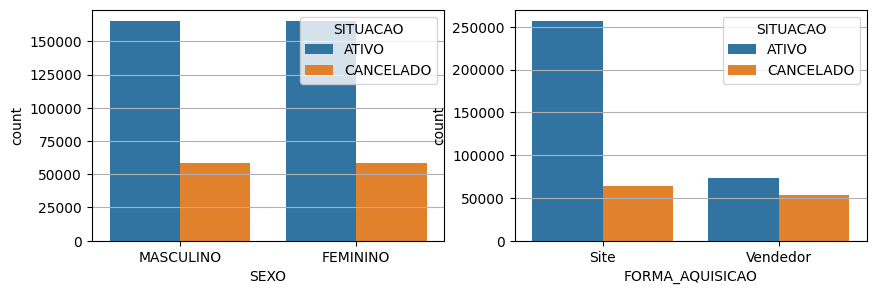

In [15]:
#Analyzing the relationship between FORMA_AQUISICAO and SEX variables with the TARGET variable
#The analysis shows no significant differences or patterns in these variables

plt.rcParams['figure.figsize'] = (10, 3) # setting figure size for plots
plt.rcParams['axes.grid'] = True # enabling grid for better readability
f, axes = plt.subplots(1, 2) # creating subplots for side-by-side comparison
sns.countplot(data = primary_dataframe, x = 'SEXO', hue = 'SITUACAO', ax = axes[0]) # count plot for SEXO vs SITUACAO
sns.countplot(data = primary_dataframe, x = 'FORMA_AQUISICAO', hue = 'SITUACAO', ax = axes[1]) # count plot for FORMA_AQUISICAO vs SITUACAO
plt.show() # displaying the plots

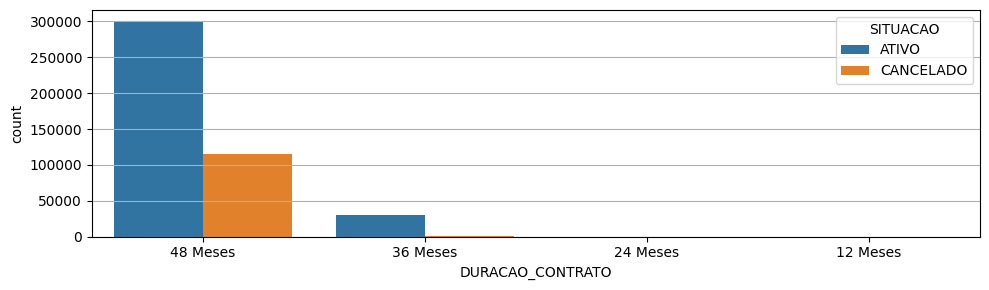

In [16]:
#Analyzing the graph of the variable DURACAO_CONTRATO compared to the target variable
#The analysis shows no significant differences or patterns in these variables

plt.rcParams['figure.figsize'] = (10, 3) # setting figure size for plots
plt.rcParams['figure.autolayout'] = True # enabling automatic layout adjustment
sns.countplot(data = primary_dataframe, x = 'DURACAO_CONTRATO', hue = 'SITUACAO') # count plot for DURACAO_CONTRATO vs SITUACAO
plt.show() # displaying the plot

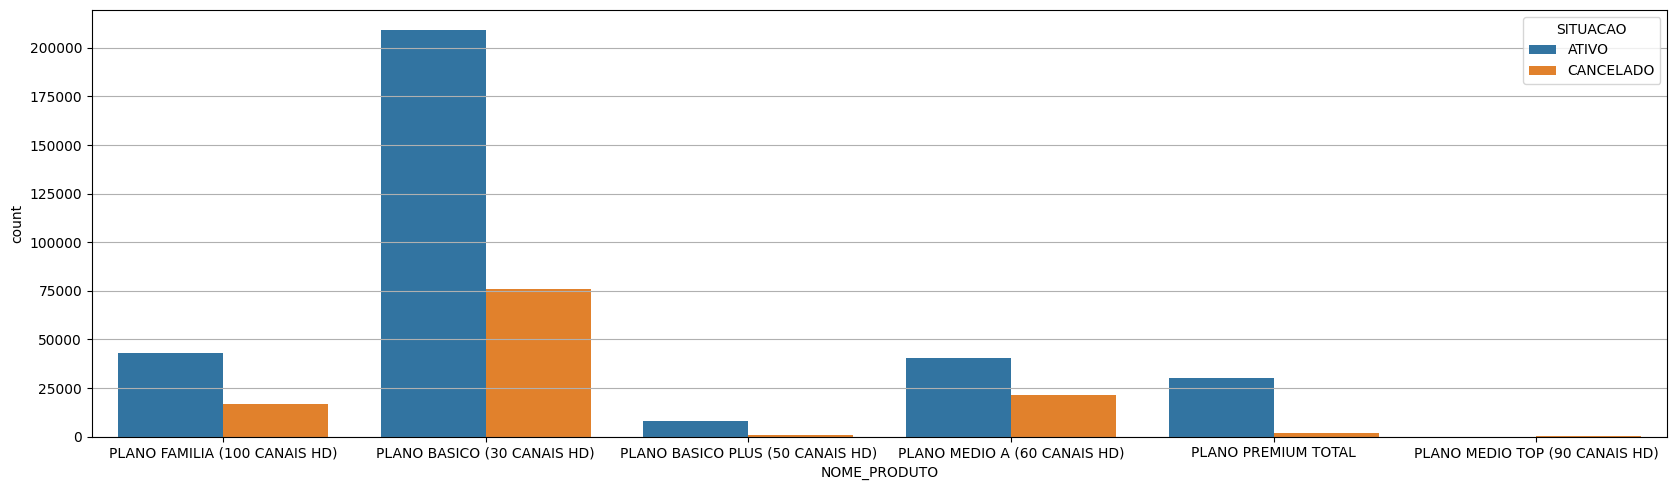

In [17]:
#Analyzing the graph of the variable PRODUCT_NAME compared to the variable TARGET
#The analysis shows no significant differences or patterns in these variables
plt.rcParams['figure.figsize'] = (17, 5) # setting figure size for plots
plt.rcParams['figure.autolayout'] = True # enabling automatic layout adjustment
sns.countplot(data = primary_dataframe, x = 'NOME_PRODUTO', hue = 'SITUACAO') # count plot for NOME_PRODUTO vs SITUACAO
plt.show()

<Axes: title={'center': 'Active customers vs inactive customers'}, xlabel='SITUACAO'>

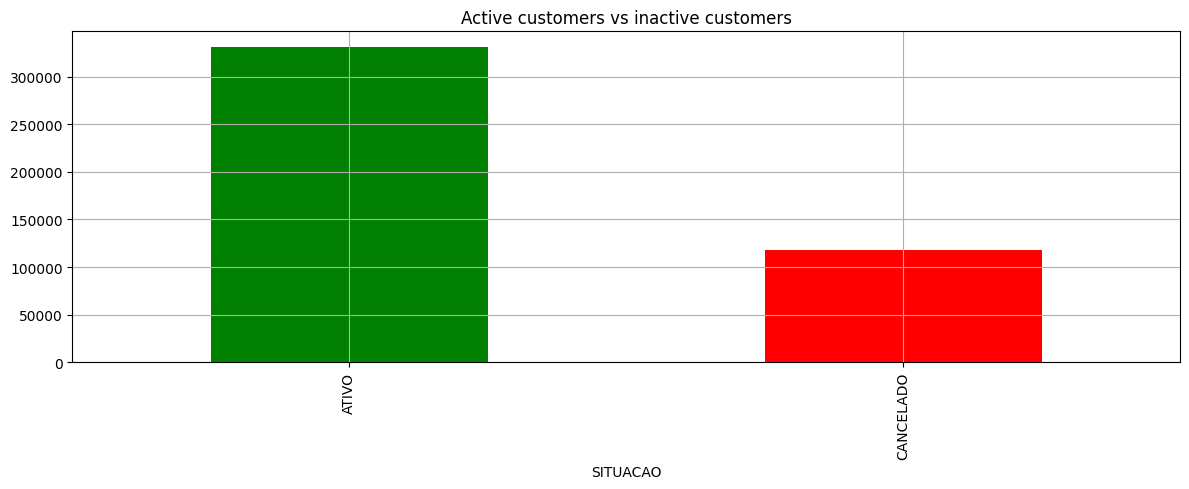

In [18]:
# Analyzing how the target variable is distributed
# What we can observe is that there are more active customers than canceled ones
plt.rcParams["figure.figsize"] = [12, 5] # setting figure size for plots
plt.rcParams["figure.autolayout"] = True # enabling automatic layout adjustment
primary_dataframe.SITUACAO.value_counts().plot(kind='bar', title='Active customers vs inactive customers', color = ['green', 'red']) # plotting the count of active vs inactive customers

### Analyzing numerical variables

In [19]:
#Loading the variables for the plot
#We will not use the customer ID [id 0]

numerical_variables = [] # list of numerical variables
for i in primary_dataframe.columns[1:24].to_list(): # 
    if primary_dataframe.dtypes[i] == 'int64' or primary_dataframe.dtypes[i] == 'float64':
        print(i, ':', primary_dataframe.dtypes[i]) # printing the variable name and its data type
        numerical_variables.append(i)

IDADE_CLIENTE : int64
QT_FILHOS : float64
DIAS_ATIVO : int64
MESES_ATIVO : int64
VL_PLANO_ADESAO : int64
VL_PLANO_ATUAL : int64
QT_PONTOS_INSTALADOS : int64
QT_PC_PAGAS : int64
QT_PC_VENCIDAS : int64
QT_PC_PAGA_ATRASO : int64
QT_PC_PAGA_EM_DIA : int64
QT_ACORDO_PAGAMENTO : int64
VL_MENSALIDADE_ATRASO : int64
VL_MENSALIDADE_DT_AQUISICAO : int64
VL_MENSALIDADE_DT_ATUAL : int64
COD_SITUACAO : int64


In [20]:
# Printing the size of the numerical variables list
print(f'Numerical variables size: {len(numerical_variables)}') # printing the size of the numerical variables list

Numerical variables size: 16


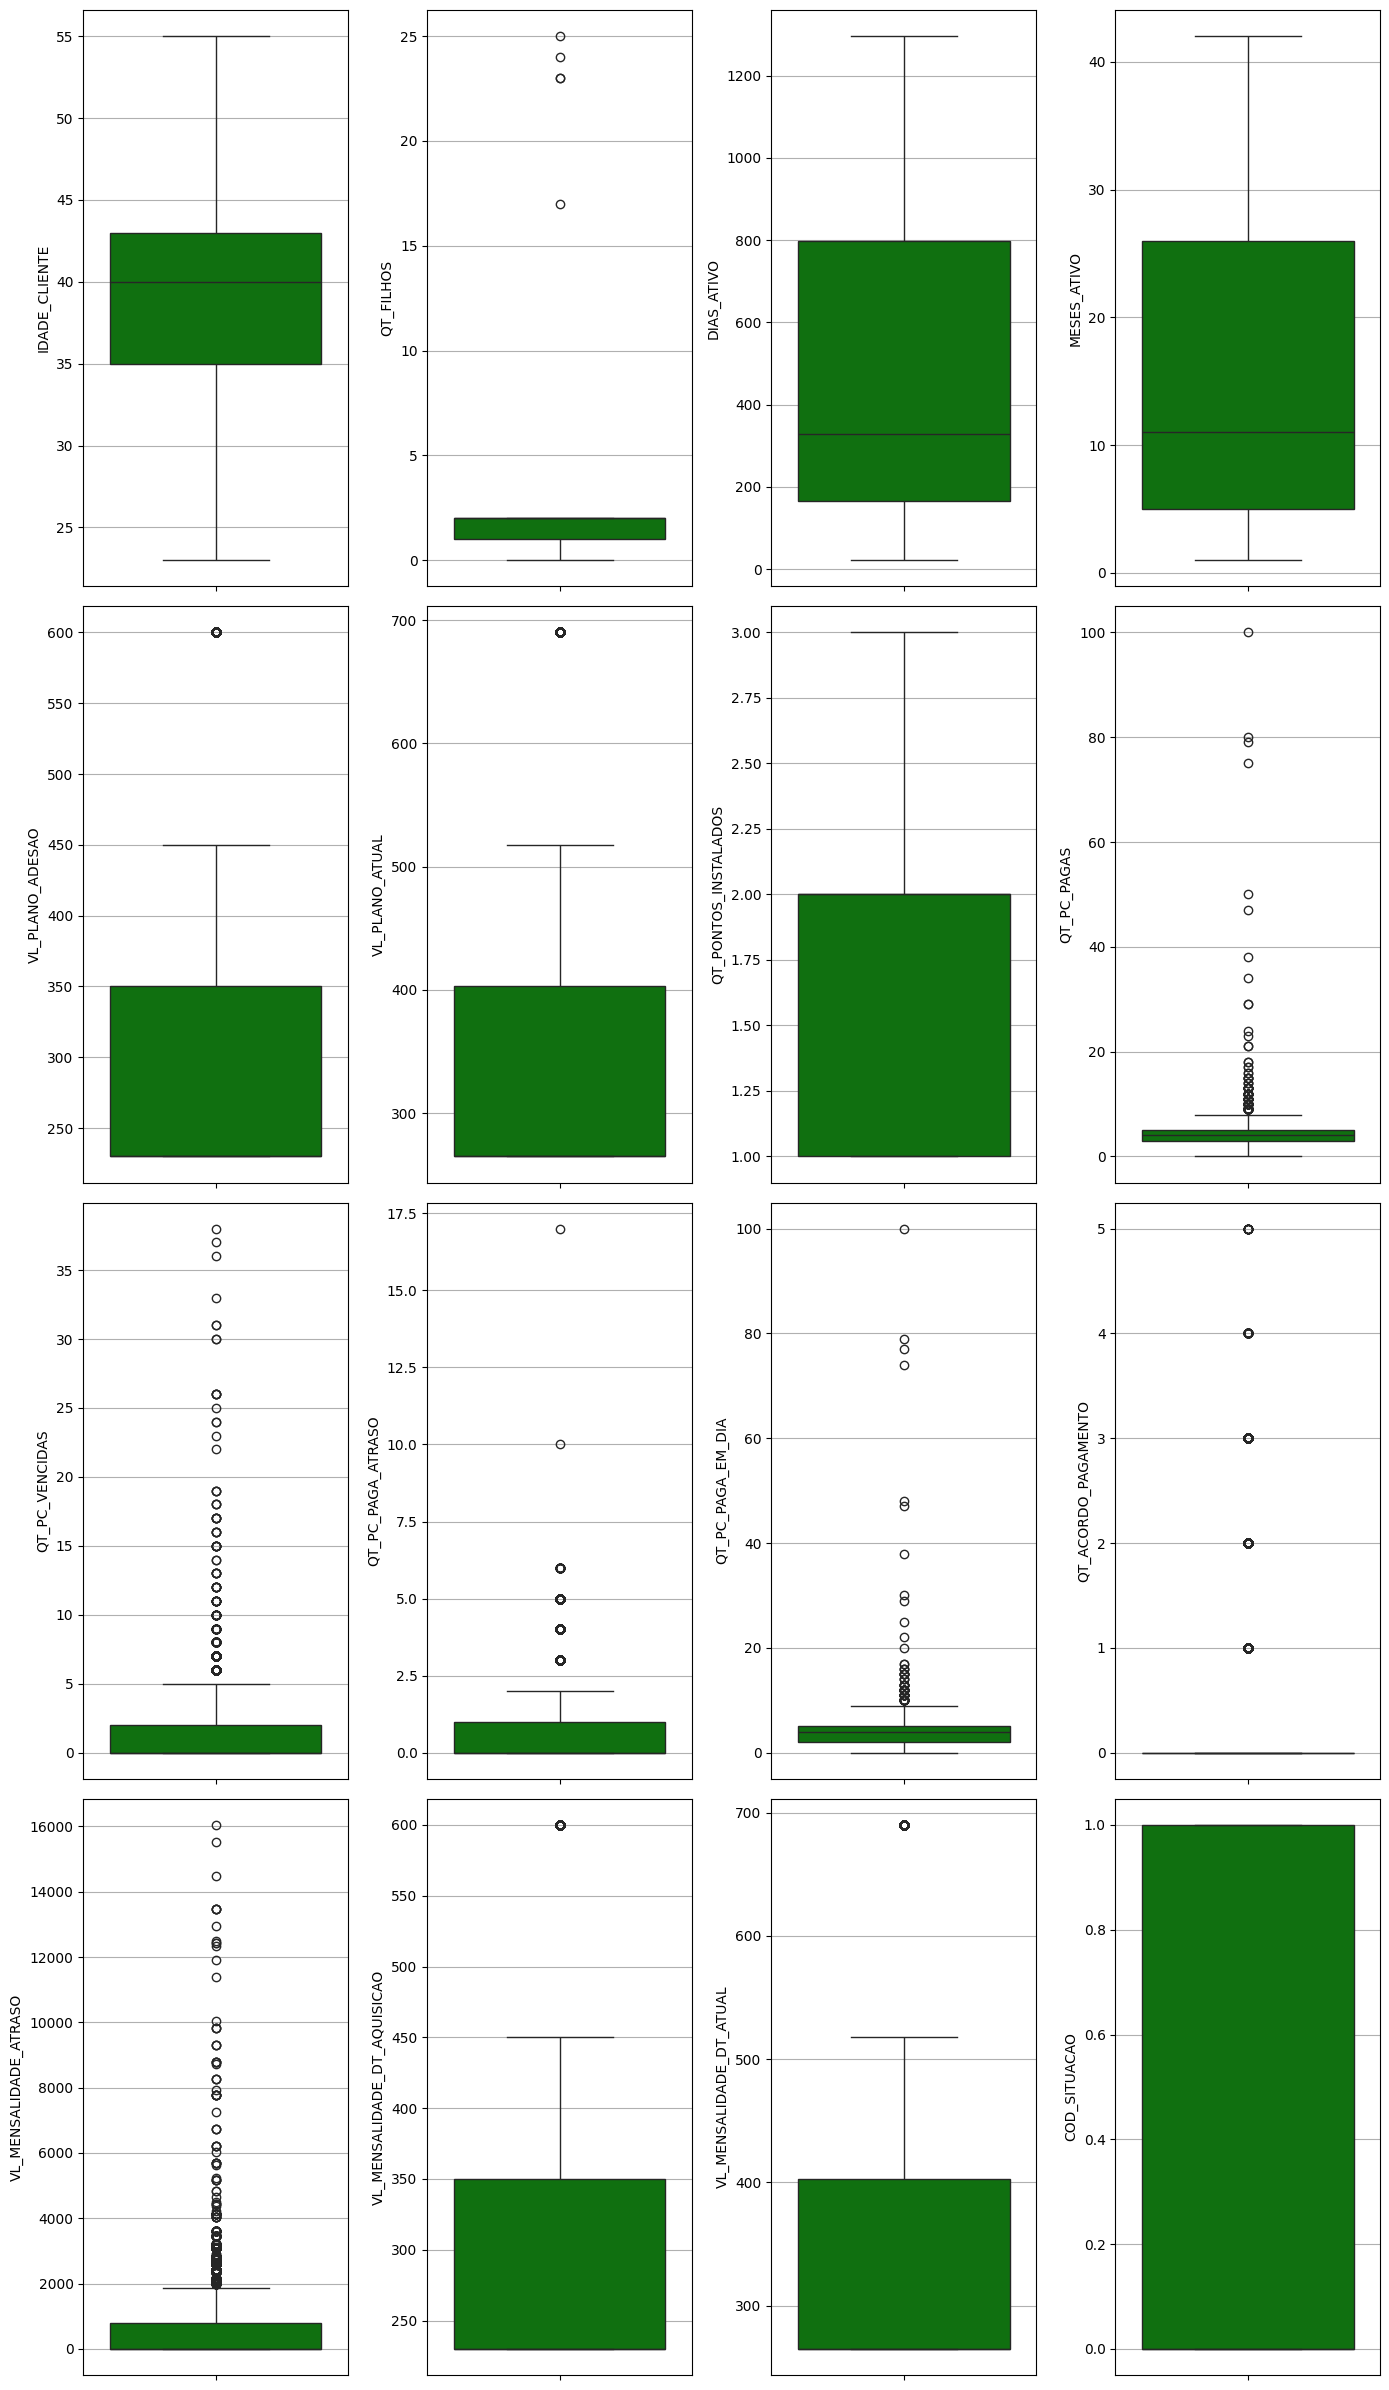

In [21]:
# Through the boxplots presented below, we can observe possible outliers in the numerical variables
# We need to analyze these variables

plt.rcParams['figure.figsize'] = (14, 24) # setting figure size for plots
plt.rcParams['figure.autolayout'] = True # enabling automatic layout adjustment
f, axes = plt.subplots(4, 4) # 4 lines and 4 columns of subplots

row = 0
column = 0

for i in numerical_variables:
    sns.boxplot(data = primary_dataframe, y = i, ax = axes[row][column], color = 'green')
    column += 1 # moving to the next column
    if column == 4: # if we reach the end of the row
        row += 1
        column = 0
plt.show() # displaying the boxplots

The variables QT_PAGA_EM_DIA and QT_PC_PAGAS have a number greater than the maximum contract term, so we can assume these outliers were generated by an error and will address them.

The variable QT_CHILDREN also has some outliers, such as 17, 23, and 24 children. Let's evaluate these values.

In [22]:
# Since the number of outliers in this variable is small, I can exclude the outliers
primary_dataframe.groupby(['QT_FILHOS']).size() # grouping by 'QT_FILHOS' and counting occurrences

QT_FILHOS
0.0         10
1.0     212353
2.0     235825
17.0         1
23.0         2
24.0         1
25.0         1
dtype: int64

In [23]:
# We can see that there are some outliers in the variable QT_FILHOS, such as 17, 23, and 24 children.
primary_dataframe.loc[primary_dataframe['QT_FILHOS'] > 2]

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
91,92,Vendedor,48,FEMININO,23.0,03/08/2018,NaN,1083,35,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
164,165,Vendedor,55,MASCULINO,23.0,19/06/2018,NaN,1128,37,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,2,3,1,0,230,265,ATIVO,0
273,274,Vendedor,32,FEMININO,24.0,02/05/2018,NaN,1176,38,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,2,3,1,0,230,265,ATIVO,0
454,455,Vendedor,38,MASCULINO,25.0,04/09/2018,NaN,1051,34,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,1,0,230,265,ATIVO,0


## exploratory data analysis

We will treat the data identified in exploratory data analyses.

- Treat outliers
- Treat missing values
- Treat the variables QT_PC_PAGA_EM_DIA and QT_PC_PAGAS
- Feature engineering (Create new variables) 
- Apply one hot encoding


In [24]:
# We will keep the original dataframe and the preprocessed data will be in the dataframe primary_dataframe
secondary_dataframe = primary_dataframe.copy() # creating a copy of the primary dataframe for preprocessing
secondary_dataframe = primary_dataframe.loc[primary_dataframe['QT_FILHOS'] <= 2] # filtering out the outliers in the QT_FILHOS variable
secondary_dataframe.shape # checking the shape of the secondary DataFrame after filtering

(448188, 24)

In [25]:
secondary_dataframe.groupby(['QT_FILHOS']).size() # grouping by 'QT_FILHOS' and counting occurrences

QT_FILHOS
0.0        10
1.0    212353
2.0    235825
dtype: int64

In [26]:
print('Children mean', secondary_dataframe['QT_FILHOS'].mean()) # calculating and printing the mean of the QT_FILHOS variable
print('Children median', secondary_dataframe['QT_FILHOS'].median()) # calculating and printing the median of the QT_FILHOS variable
print('Children mode', secondary_dataframe['QT_FILHOS'].mode()[0]) # calculating and printing the mode of the QT_FILHOS variable

Children mean 1.5261519719403465
Children median 2.0
Children mode 2.0


In [27]:
# Filling the null values with the median of the data
secondary_dataframe['QT_FILHOS'] = secondary_dataframe['QT_FILHOS'].fillna((secondary_dataframe['QT_FILHOS']).median())
secondary_dataframe.isnull().sum() # checking for missing values in the secondary DataFrame after filling nulls.

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                           0
DT_AQUISICAO                        0
DT_CANCELAMENTO                330987
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [34]:
# Replacing the values in the DURACAO_CONTRATO column
# We need to replace categorical values with numerical values for better analysis
secondary_dataframe['DURACAO_CONTRATO'] = secondary_dataframe['DURACAO_CONTRATO'].replace(['12 Meses'], 12)# replacing the values in the DURACAO_CONTRATO column
secondary_dataframe['DURACAO_CONTRATO'] = secondary_dataframe['DURACAO_CONTRATO'].replace(['24 Meses'], 24)
secondary_dataframe['DURACAO_CONTRATO'] = secondary_dataframe['DURACAO_CONTRATO'].replace(['36 Meses'], 36)
secondary_dataframe['DURACAO_CONTRATO'] = secondary_dataframe['DURACAO_CONTRATO'].replace(['48 Meses'], 48)

In [35]:
secondary_dataframe.head() # displaying the first few rows of the secondary DataFrame

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [36]:
secondary_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448188 non-null  int64  
 1   FORMA_AQUISICAO              448188 non-null  object 
 2   IDADE_CLIENTE                448188 non-null  int64  
 3   SEXO                         448188 non-null  object 
 4   QT_FILHOS                    448188 non-null  float64
 5   DT_AQUISICAO                 448188 non-null  object 
 6   DT_CANCELAMENTO              117201 non-null  object 
 7   DIAS_ATIVO                   448188 non-null  int64  
 8   MESES_ATIVO                  448188 non-null  int64  
 9   DURACAO_CONTRATO             448188 non-null  int64  
 10  VL_PLANO_ADESAO              448188 non-null  int64  
 11  VL_PLANO_ATUAL               448188 non-null  int64  
 12  NOME_PRODUTO                 448188 non-null  object 
 13  QT_P

In [38]:
# Indentifying the maximum quantity to treat outliers
print(secondary_dataframe['QT_PC_PAGAS'].max()) # printing the maximum value of the QT_PC_PAGAS variable
print(secondary_dataframe['QT_PC_PAGA_EM_DIA'].max()) # printing the maximum value of the QT_PC_PAGA_EM_DIA variable

100
100


Varibles that are greater than the maximum term will have the same value as the longest term, which is 48 months

In [41]:
# Feature engineering
# Creating a new payment level category variable acording to the number of installments paid

bins = [-100, 3, 6, 12, 48] # defining bins for categorization
labels = ['bad', 'regular', 'good', 'excellent'] # defining labels for the bins
secondary_dataframe['NIVEL_PAGAMENTO'] = pd.cut(secondary_dataframe['QT_PC_PAGAS'], bins=bins, labels=labels) # creating the new variable 'NIVEL_PAGAMENTO' based on the number of installments paid
pd.value_counts(secondary_dataframe['NIVEL_PAGAMENTO'])# counting the number of occurrences in the 'NIVEL_PAGAMENTO' variable

NIVEL_PAGAMENTO
regular      297750
bad          149912
good            488
excellent        33
Name: count, dtype: int64

In [42]:
secondary_dataframe.head() # displaying the first few rows of the secondary DataFrame

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,bad
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,regular
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,regular
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,regular
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,regular


In [43]:
third_datframe = secondary_dataframe.copy() # creating a copy of the secondary DataFrame for further processing
third_datframe.head() # displaying the first few rows of the third DataFrame

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,bad
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,regular
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,regular
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,regular
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,regular


In [45]:
# Create encoder
# Apply the encoder to the categorical variables
lb = LabelEncoder() # initializing the label encoder
third_datframe['SEXO'] = lb.fit_transform(third_datframe['SEXO']) # encoding the 'SEXO' variable
third_datframe['FORMA_AQUISICAO'] = lb.fit_transform(third_datframe['FORMA_AQUISICAO']) # encoding the 'FORMA_AQUISICAO' variable
third_datframe['NOME_PRODUTO'] = lb.fit_transform(third_datframe['NOME_PRODUTO']) # encoding the 'NOME_PRODUTO' variable
third_datframe['NIVEL_PAGAMENTO'] = lb.fit_transform(third_datframe['NIVEL_PAGAMENTO']) # encoding the 'NIVEL_PAGAMENTO' variable